# Getting Data - I


There are multiple ways of getting data into python, depending on where the data is stored. The simplest case is when you have data in CSV files, but often, you need to get data from other formats, sources and documents, such as text files, relational databases, websites, APIs, PDF documents, etc. 

In the following sections, you will learn to get data into python from a number of sources. You will learn to:
* Get data from text files
* Get data from relational databases
* Scrape data from websites
* Get data from publicly available APIs
* Read PDFs into python

In the process, you will also learn how to deal with nuances that inevitably come while getting data from various sources.


### Reading Delimited Files

Delimited files are usually text files, where columns are separated by delimiters (such as commas, tabs, semicolons etc.) and each new line is a row.

For instance, we have the ```companies.txt``` file, where each column is separated by a tab:

<img src="companies.png" style="height: 500px; width: 600px">

The easiest way to read delimited files is using ```pd.read_csv(filepath, sep, header)``` and specify a separator (delimiter).



In [1]:
import numpy as np
import pandas as pd

# reading companies file: throws an error
# companies = pd.read_csv("companies.txt", sep="\t")

The error appears because of a decoding issue pandas is facing. The best way to resolve such problems to search for help, for example on stack overflow, where you'd get excellent suggestions from the community.

One possible solution to this problem is found here: https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python

In [2]:
# Using encoding = "ISO-8859-1"
companies = pd.read_csv("companies.txt", sep="\t", encoding = "ISO-8859-1")
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


### Getting Data From Relational Databases

Data is commonly stored in RDBMS, and it is easy to get it into Python. We'll use the most common one - MySQL.

There are many libraries to connect MySQL and Python, such as pymysql, MySQLdb, etc. All of them follow the following procedure to connect to MySQL:
- Create a connection object between MySQL and python
- Create a cursor object (you use the cursor to open and close the connection) 
- Execute the SQL query 
- Retrive results of the query using methods such as ```fetchone()```, ```fetchall()```, etc.

Let' work through an example using PyMySQL. You can install it using ```pip install pymysql```.

In [5]:
import pymysql

# create a connection object 'conn'
conn = pymysql.connect(host="localhost", # your host, localhost for your local machine
                     user="root", # your username, usually "root" for localhost
                      passwd="yourpassword", # your password
                      db="world") # name of the data base; world comes inbuilt with mysql

# create a cursor object c
c = conn.cursor()

# execute a query using c.execute
c.execute("select * from city;")

# getting the first row of data as a tuple
all_rows = c.fetchall()

# to get only the first row, use c.fetchone() instead

OperationalError: (2003, "Can't connect to MySQL server on 'localhost' ([WinError 10061] No connection could be made because the target machine actively refused it)")

In [ ]:
# notice that it returns a tuple of tuples: each row is a tuple
print(type(all_rows))

# printing the first few rows
print(all_rows[:5])

Now, it would be useful to convert the list into a dataframe, since you can now work with dataframes easily. In this case, you can use the ```pd.DataFrame()``` function, and pass the list version of the tuple.

```pd.DataFrame(list_of_tuples)``` converts each tuple in the list to a row in the DF.

In [ ]:
df = pd.DataFrame(list(all_rows), columns=["ID", "Name", "Country", "District", "Population"])
df.head()

### Getting Data From Websites

Web scraping refers to the art of programmatically getting data from the internet.  One of the coolest features of python is that it makes it easy to scrape websites.

In Python 3, the most popular library for web scraping is ```BeautifulSoup```. To use ```BeautifulSoup```, we will also need the ```requests``` module, which basically connects to a given URL and fetches data from it (in HTML format). A web page is basically HTML code, and the main use of ```BeautifulSoup``` is that it helps you parse HTML easily. 

**Note**: Discussion on HTML syntax is beyond the scope of this module, though even very basic HTML experience should be enough to understand web scraping. 

#### Use Case - Fetching Mobile App Reviews from Google Playstore

Let's say you want to understand why people install and uninstall mobile apps, and why they like or dislike certain apps. A very rich source of app-reviews data is the Google Playstore, where people write their feedback about the app. 

The reviews of the Facebook messenger app can be found here: https://play.google.com/store/apps/details?id=com.facebook.orca&hl=en

We will scrape reviews of the Messenger app, i.e. get them into python, and then you can do some interesting analyses on that.


#### Parsing HTML Data using  BeautifulSoup and Requests

To start using BeautifulSoup, install it using ```pip install beautifulsoup4```, and load the module bs4 using ```import bs4```. Also, install the requests module using ```pip install requests```.

The general procedure to get data from websites is:
1. Use ```requests``` to connect to a URL and get data from it
2. Create a ```BeautifulSoup``` object 
3. Get attributes of the ```BeautifulSoup``` object (i.e. the HTML elements that you want)

In [11]:
import requests, bs4

# getting HTML from the Google Play web page
url = "https://play.google.com/store/apps/details?id=com.facebook.orca&hl=en"
req = requests.get(url)

# create a bs4 object
# To avoid warnings, provide "html5lib" explicitly
soup = bs4.BeautifulSoup(req.text, "html.parser")


Once you have a bs4 object, you can use it to get specific parts of the HTML document. 

In HTML, the most common elements are either a part of a ```class```, or are assigned an ```id```. A typical HTML code looks like this:


```
    <body>
        <div class="some_class">
            <p id="a_unique_id">
                A paragraph that you can read on the webpage here.
            </p>
        </div>
    </body>
```


The easiest way to get specific parts of the webpage is using the ```soup.select()``` method of bs4. For e.g.:
- ```soup.select('div')``` selects all the elements inside a 'div' tag
- ```soup.select('div > p')``` selects all the ```<p>``` elements within div tags
- ```soup.select('.some_class')``` selects elements inside  ```class = "some_class"```
- ```soup.select('#some_id')``` selects all the elements inside the ```id="some_id"``` element 


Now, you need to find the ids / classes / divs etc. inside which the reviews are located. To find those, go to the webpage, right click, and choose 'Inspect'. It will open up the HTML code.

We'll not go into details, but if you look carefully, all the reviews are located inside a ```<div class="review-body"> ```. So we use that class to fetch the reviews.


['html',
 <html dir="ltr" lang="en"><head><base href="https://play.google.com/"/><meta content="origin" name="referrer"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="yes" name="mobile-web-app-capable"/><meta content="yes" name="apple-mobile-web-app-capable"/><meta content="sBw2N8uateIzRr93vmFze5MF_35vMk5F1wG04L5JcJE" name="google-site-verification"/><meta content="PJKdyVFC5jlu_l8Wo_hirJkhs1cmitmn44fgpOc3zFc" name="google-site-verification"/><link href="/opensearch.xml" rel="search" title="Google Play" type="application/opensearchdescription+xml"/><link href="//www.gstatic.com/android/market_images/web/favicon_v3.ico" rel="shortcut icon"/><script data-id="_gd" nonce="GEeCpagD59AuSCvsIEcYHA">window.WIZ_global_data = {"AKEyDc":"%.@.[\"com.ncsoft.lineagem19\",\"com.ncsoft.lineage2m19\",\"com.ncsoft.bns2\",\"com.ncsoft.bns219\",\"com.ncsoft.lineage2mjp\",\"com.ncsoft.lineage2mtw\",\"com.ncsoft.lineagew\",\"com.ncsoft.lineage2mnu\",\"jp.co.ncjapan.janry
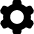
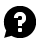
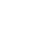
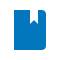
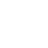
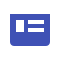
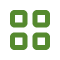
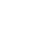
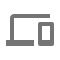
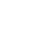
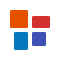
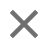
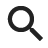
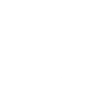
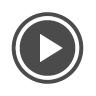

In [15]:
soup.contents

In [17]:
# getting all the text inside class = "review-body"
reviews = soup.select('.review-body')
print(type(reviews))
print(len(reviews))
print("\n")

# printing an element of the reviews list
print(reviews[6])

<class 'bs4.element.ResultSet'>
0




IndexError: list index out of range

Notice that ```reviews``` is a list, and each element of the list contains some HTML code + the review string that we want.

We still need to subset only the actual review string, and ignore all the other HTML, as shown in the highlighted section below (we want the bold string).

```<div class="review-body with-review-wrapper"> <span class="review-title"></span>```
**I love this app for it has many features but this is stressing me out bc it eats a lot of space and im only using samsung which is definitely cheap in giving internal storage. I have a lot of needs also, optimize the space of messenger. Thankyou. :) ily ppl who developed this. ** 
```<div class="review-link" style="display:none"> <a class="id-no-nav play-button tiny" href="#" target="_blank"> Full Review </a> </div> </div>```


Now, there are more than one ways to so this. One way is to ```str.split()``` the entire string into two parts using ```</span>``` as the separator (```str.split("sep")``` separates a string into two parts at "sep").

Then we'll get this:

**I love this app for it has many features but this is stressing me out bc it eats a lot of space and im only using samsung which is definitely cheap in giving internal storage. I have a lot of needs also, optimize the space of messenger. Thankyou. :) ily ppl who developed this. ** 
```<div class="review-link" style="display:none"> <a class="id-no-nav play-button tiny" href="#" target="_blank"> Full Review </a> </div> </div>```

And then ```str.split()``` this string again using ```<div class="review-link'``` as the separator, so we'll get only the review string, i.e.:

**I love this app for it has many features but this is stressing me out bc it eats a lot of space and im only using samsung which is definitely cheap in giving internal storage. I have a lot of needs also, optimize the space of messenger. Thankyou. :) ily ppl who developed this. ** 
 

In [18]:
# step 1: split using </span>
r = reviews[6]
print(type(r))

# r is a bs4 tag, convert it into string to use str.split() 
part1 = str(r).split("</span>")
print(part1)

IndexError: list index out of range

In [19]:
# Now split part1 using '<div class="review-link' as the separator
# and get the first element of the resulting list
# we get the review
part2 = part1[1].split('<div class="review-link')[0]
part2

NameError: name 'part1' is not defined

So after applying ```str.split()``` twice, we get the review string.  Now, we simply apply this sequence of splitting to every element of the ```reviews``` list.

In [20]:
# apply this sequence of splitting to every element of the reviews list
# using a list comprehension
reviews_text = [str(r).split("</span>")[1].split('<div class="review-link')[0] for r in reviews]

# printing the first 10 reviews
reviews_text[0:10]

[]


Now you can do some interesting analyses on the reviews, e.g. find how many people complain about memory, storage space, built-in camera etc.

In [22]:
# Practice problem: Scraping amazon.in to get shoe price data 
import pprint

url = "https://www.amazon.in/s/ref=nb_sb_noss?url=search-alias%3Daps&field-keywords=sport+shoes"
req = requests.get(url)

# create a bs4 object
# To avoid warnings, provide "html5lib" explicitly
soup = bs4.BeautifulSoup(req.text, "html.parser")

# get shoe names
# shoe_data = soup.select('.a-size-medium')
# shoe_data = soup.select('.a-size-small.a-link-normal.a-text-normal')
# print(len(shoe_data))
# print(pprint.pprint(shoe_data))

# get shoe prices
shoe_prices = soup.select('.a-price-whole')
print(len(shoe_prices))
pprint.pprint(shoe_prices)

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))